# Data Aquisition



In [2]:
import os
import zipfile
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"

if not os.path.exists(filename):
    print("Downloading...")
    urllib.request.urlretrieve(url, filename)

if not os.path.exists("cats_and_dogs_filtered"):
    print("Extracting...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()


### Run the following code in your terminal window to install required dependencies

```
conda install -c conda-forge opencv
```

and then 

```
conda install -c conda-forge pathlib
```


In [3]:
import os
import zipfile
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

if not os.path.exists("cats_and_dogs_filtered"):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

# I Problem Formulation 

With this numerical data, we find that the folder is split into two categories - cats and dogs. Since this data is appropriately grouped, we can use this model for classification purposes. Once we train our model, we can use it to discern images based on their properties.


# II. Data Preprocessing and Cleaning

Once retrieving the data, we now want to store these images with a numerical representation. Since they are .JPG files, we can decompose them into 3 matrices representing the levels of intensity of red, green, and blue. This is known as an RGB Tensor.

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

folder_path = "cats_and_dogs_filtered/train"

sub_directories = ["cats", "dogs"]
size = 128 #adjusting pixel size 

tensors = [] #storing image as 3d tensor
classification = [] # 1 for dog & 0 for cat


for label, directory in enumerate(sub_directories):
    sub_folder_path = os.path.join(folder_path, directory)
    for filename in os.listdir(sub_folder_path):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(sub_folder_path, filename)
            img = cv2.imread(image_path)
            if img is None:
                print(f"{filename} not found")
                continue
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (size, size))
            tensor = img_resized.astype('float32') / 255.0
            tensors.append(tensor)
            classification.append(label)  # 0 for cat, 1 for dog

tensors = np.array(tensors)
classification = np.array(classification)

print(f"tensor shape: {tensors.shape}")

tensor shape: (2000, 128, 128, 3)


We can display these images based on their classification value. Let's start by displaying a randomly chosen dog along with its numerical description.

Tensor array for dog.778.jpg:
[[[0.5882353  0.6509804  0.7529412 ]
  [0.58431375 0.64705884 0.7490196 ]
  [0.5764706  0.6392157  0.7372549 ]
  ...
  [0.2901961  0.3137255  0.30588236]
  [0.28627452 0.30980393 0.3019608 ]
  [0.27058825 0.29411766 0.28627452]]

 [[0.60784316 0.6627451  0.7647059 ]
  [0.59607846 0.65882355 0.75686276]
  [0.59607846 0.654902   0.74509805]
  ...
  [0.3019608  0.3254902  0.31764707]
  [0.2901961  0.3137255  0.30588236]
  [0.25882354 0.28235295 0.27450982]]

 [[0.5372549  0.58431375 0.67058825]
  [0.5529412  0.6117647  0.69411767]
  [0.5882353  0.6392157  0.7137255 ]
  ...
  [0.26666668 0.2901961  0.28235295]
  [0.24313726 0.26666668 0.25882354]
  [0.21176471 0.23529412 0.22745098]]

 ...

 [[0.29803923 0.3019608  0.30980393]
  [0.3019608  0.30588236 0.3137255 ]
  [0.30588236 0.30588236 0.30588236]
  ...
  [0.2        0.20392157 0.18431373]
  [0.21176471 0.21568628 0.19607843]
  [0.21960784 0.22745098 0.20784314]]

 [[0.28235295 0.28627452 0.29411766]
  [0.28

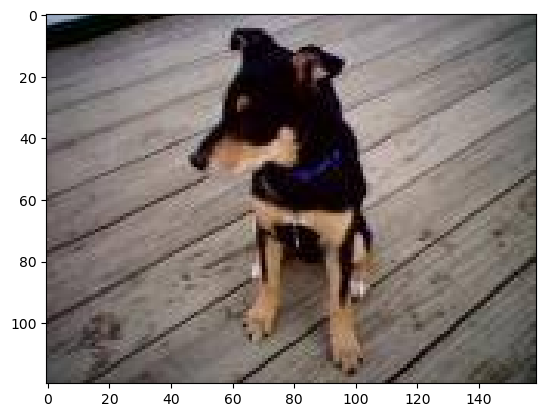

In [5]:
import random 

number = random.randint(0,999)
dog_folder = 'cats_and_dogs_filtered/train/dogs'
iteration = 0

file_choice = dog_folder + "/dog." + str(number) + ".jpg"

img = cv2.imread(file_choice)
if img is None:
    print(f"Warning: Unable to read {file_choice}")

    # Convert BGR to RGB
img_dog = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to tensor (normalized float32 numpy array)
tensor = img_dog.astype('float32') / 255.0

    # Print the tensor array
print(f"Tensor array for {filename}:")
print(tensor)
print(f"Shape: {tensor.shape}, dtype: {tensor.dtype}")

            # Optionally, display the image and tensor side by side
plt.imshow(img_dog)
plt.show()
        


Now... let's display a cat!

Tensor array for cats_and_dogs_filtered/train/cats/cat.717.jpg:
[[[0.6117647  0.5568628  0.54509807]
  [0.60784316 0.5647059  0.54901963]
  [0.6039216  0.56078434 0.5529412 ]
  ...
  [0.6862745  0.5568628  0.34901962]
  [0.6862745  0.5568628  0.34901962]
  [0.6862745  0.5568628  0.34901962]]

 [[0.6117647  0.5568628  0.54509807]
  [0.60784316 0.5647059  0.54901963]
  [0.6        0.5568628  0.54901963]
  ...
  [0.68235296 0.5529412  0.34509805]
  [0.68235296 0.5529412  0.34509805]
  [0.68235296 0.5529412  0.34509805]]

 [[0.60784316 0.5529412  0.5411765 ]
  [0.6039216  0.56078434 0.54509807]
  [0.6        0.5568628  0.54901963]
  ...
  [0.6745098  0.54509807 0.3372549 ]
  [0.6745098  0.54509807 0.3372549 ]
  [0.6745098  0.54509807 0.3372549 ]]

 ...

 [[0.9372549  0.8980392  0.5176471 ]
  [0.9490196  0.9098039  0.5294118 ]
  [0.9647059  0.92941177 0.5647059 ]
  ...
  [0.6745098  0.6313726  0.5137255 ]
  [0.67058825 0.627451   0.50980395]
  [0.6666667  0.62352943 0.5058824 ]]

 [[0.93725

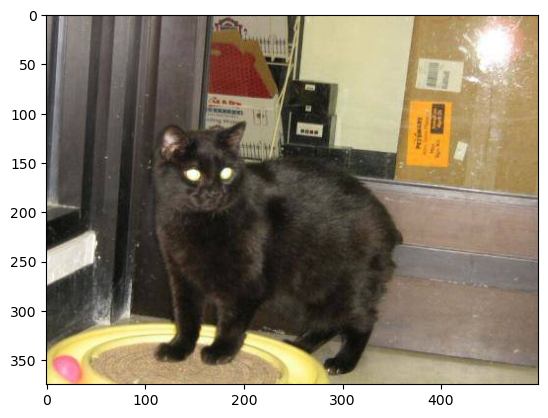

In [6]:
import random 

new_number = random.randint(0,999)
cat_folder = 'cats_and_dogs_filtered/train/cats'
iteration = 0

file_choice = cat_folder + "/cat." + str(new_number) + ".jpg"

img_cat = cv2.imread(file_choice)
if img is None:
    print(f"Warning: Unable to read {file_choice}")

    # Convert BGR to RGB
img_rgb = cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB)

    # Convert to tensor (normalized float32 numpy array)
tensor = img_rgb.astype('float32') / 255.0

    # Print the tensor array
print(f"Tensor array for {file_choice}:")
print(tensor)


plt.imshow(img_rgb)
plt.show()

We turned these images into 3 matrices (188x188) x 3 (a tensor) to describe the intensity values of red, blue, and green in the image. To improve computational complexity, we will turn the image greyscale so it is composed of a (188 x 188) x 1 matrix

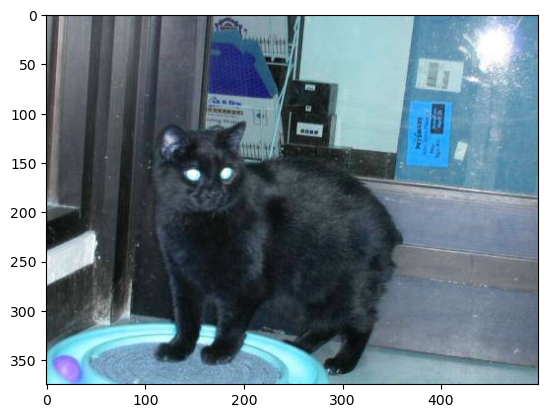

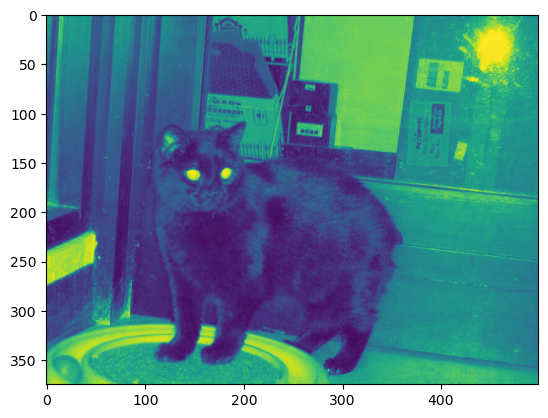

In [7]:
grayscale_cat = cv2.cvtColor(img_cat,cv2.COLOR_RGB2GRAY)

plt.imshow(img_cat)         #regular
plt.show()
plt.imshow(grayscale_cat)   #greyscale
plt.show()


We can do the same for the images of the dogs.

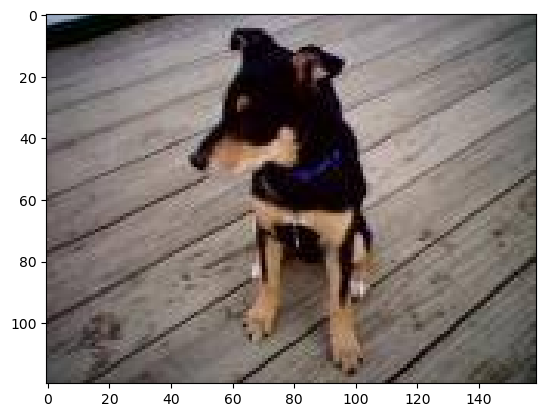

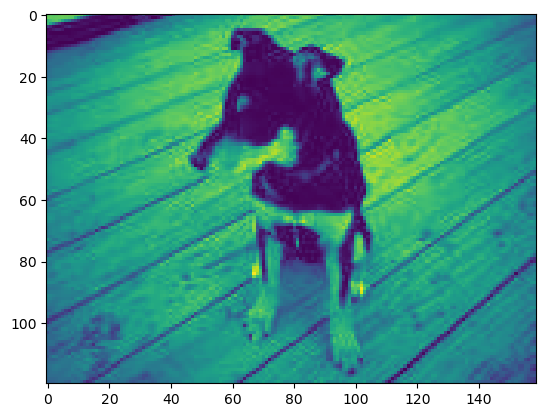

In [8]:

grayscale_dog  = cv2.cvtColor(img_dog,cv2.COLOR_RGB2GRAY)

plt.imshow(img_dog)         #regular
plt.show()
plt.imshow(grayscale_dog)   #greyscale
plt.show()

In [9]:
grey_matrices = []

iteration = 0
for tensor in tensors:
    greyscale_matrix = cv2.cvtColor(tensor,cv2.COLOR_RGB2GRAY)
    grey_matrices.append(greyscale_matrix)

# Data Processing (Part II)

The next stage in image processing is Feature Learning. This process is broken down into three distinct steps. Since we previously 

## Convolution:

We apply a series of linear transformations to the image in order to sharpen the image, reduce complexity, and assist with edge detection. Below is a visualization of how this matrix (kernel) adjusts the greyscale matrix. 

![](https://miro.medium.com/v2/resize:fit:1358/1*D6iRfzDkz-sEzyjYoVZ73w.gif)


In [10]:

#Sobel X kernel

kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])


kH, kW = kernel.shape
pad_h = kH // 2
pad_w = kW // 2

conv_one = []
for matrix in grey_matrices:
    # Pad the input tensor with zeros
    padded_input = np.pad(matrix, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an output array
    output = np.zeros_like(matrix)

    # Perform convolution manually
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = padded_input[i:i + kH, j:j + kW]

            # Ensure region and kernel have same shape
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)

    conv_one.append(output)  # append the correct output, not conv_one[0]


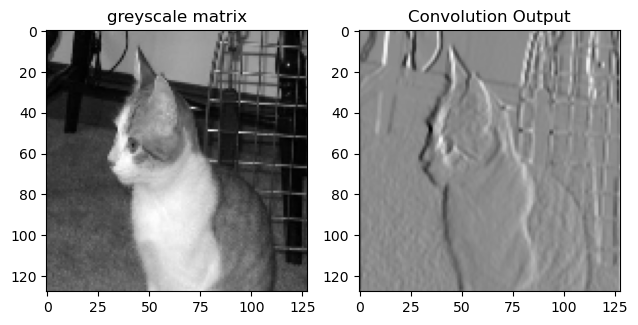

In [11]:
# Visualize input and output
plt.subplot(1, 2, 1)
plt.title("greyscale matrix")
plt.imshow(grey_matrices[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Convolution Output")
plt.imshow(conv_one[0], cmap='gray')

plt.tight_layout()
plt.show()

We will repeat the process a various times to improve edge detection.

In [12]:
conv_two = []
for matrix in conv_one:
    # Pad the input tensor with zeros
    padded_input = np.pad(matrix, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an output array
    output = np.zeros_like(matrix)

    # Perform convolution manually
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = padded_input[i:i + kH, j:j + kW]

            # Ensure region and kernel have same shape
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)

    conv_two.append(output) 

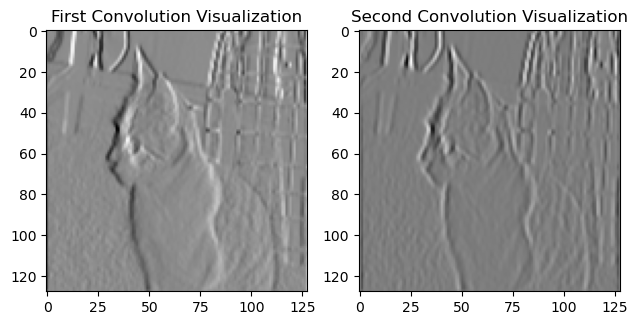

In [13]:
plt.subplot(1, 2, 1)
plt.title("First Convolution Visualization")
plt.imshow(conv_one[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Second Convolution Visualization")
plt.imshow(conv_two[0], cmap='gray')

plt.tight_layout()
plt.show()

We will now run our final convolution layer.

In [14]:
conv_three = []
for matrix in conv_two:
    # Pad the input tensor with zeros
    padded_input = np.pad(matrix, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an output array
    output = np.zeros_like(matrix)

    # Perform convolution manually
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = padded_input[i:i + kH, j:j + kW]

            # Ensure region and kernel have same shape
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)

    conv_three.append(output) 

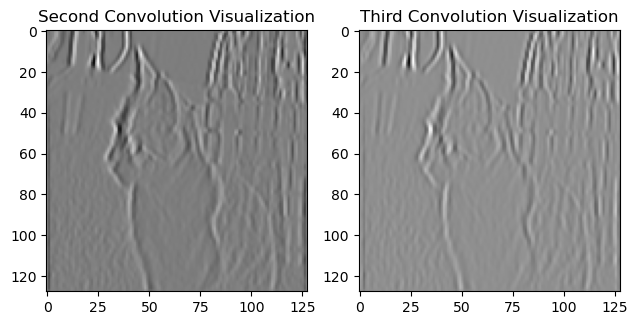

In [15]:
plt.subplot(1, 2, 1)
plt.title("Second Convolution Visualization")
plt.imshow(conv_two[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Third Convolution Visualization")
plt.imshow(conv_three[0], cmap='gray')

plt.tight_layout()
plt.show()

# Data Processing (Part III)
### ReLU - Rectified Linear Unit

For the next stage of processing, we will perform a layer of ReLU operations. The ReLU function is a piecewise continuous function which maps negative values to zero and positive values to themselves. The equation for the relu function is given by


$$f(x) = \begin{cases} x \quad x > 0\\ 0 \quad x \leq 0 \end{cases}$$


![](https://media.geeksforgeeks.org/wp-content/uploads/20250129162127770664/Relu-activation-function.png)

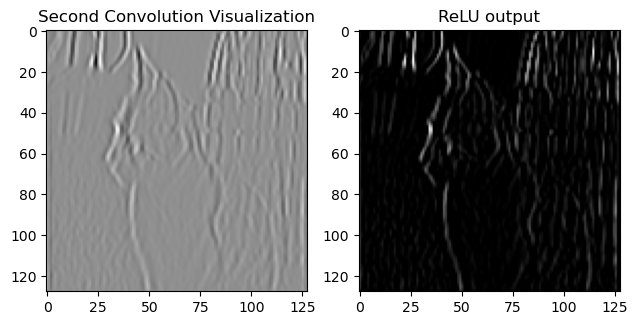

In [16]:
relu_matrices = []
for conv_matrix in conv_three:
    relu_matrix = np.maximum(0, conv_matrix)
    relu_matrices.append(relu_matrix)

#print(relu_matrices[0])

plt.subplot(1, 2, 1)
plt.title("Second Convolution Visualization")
plt.imshow(conv_three[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("ReLU output")
plt.imshow(relu_matrices[0], cmap='gray')

plt.tight_layout()
plt.show()




# IV Data Processing 

### Pooling

Similarly to algorithms covered such as PCA (Principal Component Analysis), Pooling is a tactic used for dimensionality reduction while preserving the key characteristics of the image. for the purposes of our CNN, we will be using max pooling, choosing the maximum value from a region of the mapped values.

![](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)

In [17]:
pooled_matrices = []

for matrix in relu_matrices:
    N, M = matrix.shape
    K, L = 2, 2  # Pool size
    MK = N // K
    NL = M // L
    # Crop to fit pooling window
    cropped = matrix[:MK*K, :NL*L]
    # Reshape and pool
    pooled = cropped.reshape(MK, K, NL, L).max(axis=(1, 3))
    pooled_matrices.append(pooled)

print(f"Pooled shape: {pooled_matrices[0].shape}")



Pooled shape: (64, 64)


Now to visualize the transformation

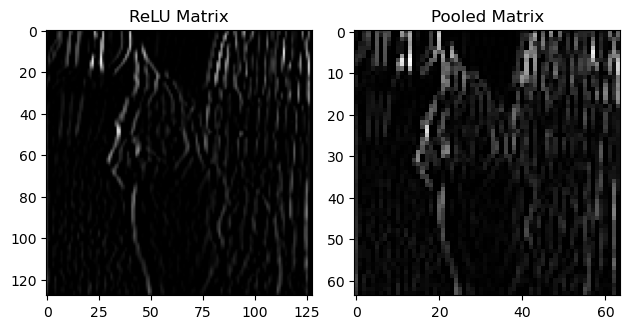

In [18]:
plt.subplot(1, 2, 1)
plt.title("ReLU Matrix")
plt.imshow(relu_matrices[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Pooled Matrix")
plt.imshow(pooled_matrices[0], cmap='gray')

plt.tight_layout()
plt.show()


# V. EDA 
### Flattening: Dimensional Reduction 

Flattening the data into a one-dimensional vector allows for a consistent exchange of information between the layers. If we restricted ourselves to the $64 \times 64$ matrix, then we would have to add further steps to our model so that the inital and subsequent transfromations are well defined for  the number of dimensions in the data. However, flattening to a $4096 \times 1 $ vector allows us to only have a single parameter - the number of rows. This allows for greater modularity in our code. Further, limiting ourselves to a single parameter reduces computational complexity.

In [19]:
feature_vectors = []
for pooled_matrix in pooled_matrices:
    feature_vector = pooled_matrix.flatten()
    feature_vectors.append(feature_vector)


print(f"Pooled shape: {pooled_matrices[0].shape}")
print(f"Feature Vector shape: {feature_vectors[0].shape}")

Pooled shape: (64, 64)
Feature Vector shape: (4096,)


# VI. Modeling, Inference, and Prediction

As mentioned earlier in lecture, since our model is a binary classification model (either dog or cat), then we will be using 4 layers of ReLU followed by a final sigmoid layer. The purpose of changing the last layer to a sigmoid activation is so that the output is a probability measure.

The Sigmoid Function is given by

$$\frac{1}{1+e^{-x}}$$

<p align="center">
  <img width="800" height="600" src="https://www.dailydoseofds.com/content/images/2023/08/image-86.png">
</p>

In [20]:
class conv_net:
    def __init__(self, input_dim=4096, hidden_dim=1024, output_dim=1, learn_rate=0.01):
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.01
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.b2 = np.zeros((1, output_dim))
        self.learn_rate = learn_rate

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def cross_entropy_loss(self, probs, labels):
        epsilon = 1e-8
        return -np.mean(labels * np.log(probs + epsilon) + (1 - labels) * np.log(1 - probs + epsilon))

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.probs = self.sigmoid(self.z2)
        return self.probs

    def backward(self, X, y):
        N = y.shape[0]
        dZ2 = self.probs - y.reshape(-1, 1)  # Fix for binary classification
        dW2 = self.a1.T @ dZ2 / N
        db2 = np.sum(dZ2, axis=0, keepdims=True) / N

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.relu_derivative(self.z1)
        dW1 = X.T @ dZ1 / N
        db1 = np.sum(dZ1, axis=0, keepdims=True) / N

        self.W1 -= self.learn_rate * dW1
        self.b1 -= self.learn_rate * db1
        self.W2 -= self.learn_rate * dW2
        self.b2 -= self.learn_rate * db2

    def predict(self, X):
        probs = self.forward(X)
        return (probs > 0.5).astype(int).flatten()


# VI. Evaluation and Validation

Now, we need to run the model and create an instance of 

In [ ]:
X = np.array(feature_vectors)
y = np.array(classification)

# Initialize model for binary classification
model = conv_net(input_dim=X.shape[1], hidden_dim=1024, output_dim=1, learn_rate=0.01)

losses = []
accuracies = []

epochs = 101
for epoch in range(epochs):
    probs = model.forward(X).flatten()  # shape: (num_samples,)
    loss = model.cross_entropy_loss(probs, y)
    model.backward(X, y)
    preds = (probs > 0.5).astype(int)  # binary prediction
    accuracy = np.mean(preds == y)
    losses.append(loss)
    accuracies.append(accuracy)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 0.9947, Accuracy: 0.4970
Epoch 10, Loss: 0.6341, Accuracy: 0.6520
Epoch 20, Loss: 0.5683, Accuracy: 0.7420
Epoch 30, Loss: 0.5032, Accuracy: 0.7940
Epoch 40, Loss: 0.4607, Accuracy: 0.8565
Epoch 50, Loss: 0.4357, Accuracy: 0.8955
Epoch 60, Loss: 0.3650, Accuracy: 0.8690
Epoch 70, Loss: 0.3266, Accuracy: 0.9305
Epoch 80, Loss: 0.4813, Accuracy: 0.6860
Epoch 90, Loss: 0.2336, Accuracy: 0.9600


Now to visualize these changes, we can plot the values. The terminology of the graph below includes the follwing keywords:

### Loss - Numerical quantifier which specifies the difference between the model's output and the true classification

### Epoch - Count of iterations which the computer processes the entire dataset

### Accuracy - $\frac{\text{Number of correct predictions}}{\text{Number of total predictions}}$ = $P(C)$ where C is the event that the model's predictions are correct

Note - The accuracy scale on the left subgraph is a measure between one and zero. This graph is known as the model's PMF (Probability Mass Function). The reason why the PMF's dependent value scale peaks at one is because the probability of ANY event must be constrained between zero and one.

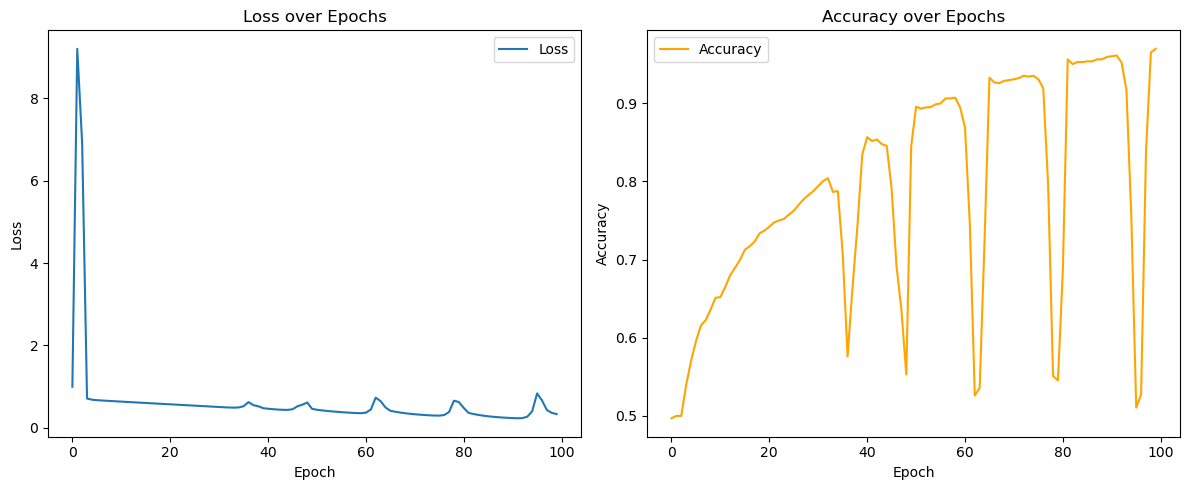

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# 

# VI. Communication